In [1]:
from transformers import ViTForImageClassification
import warnings
from PIL import Image # if will be need one pictures from dataset
warnings.filterwarnings(action='ignore')
from data.camMethods import imageMapping
from data.camMethods import preprocessingImage
from data.transformerResearch import gradForLayerNormLastLayer
from data.transformerResearch import weightsAfterPassFromViTAttention
from data.transformerResearch import gradForViTAttentionLastLayer
from data.transformerResearch import attentionCamSimilar
import torch
import torch.nn as nn

import skimage.transform
import matplotlib.pyplot as plt
from torchvision import transforms

In [2]:
# Will be use ONE picture
PATH_TO_SET = 'dataset/mergeDataset'

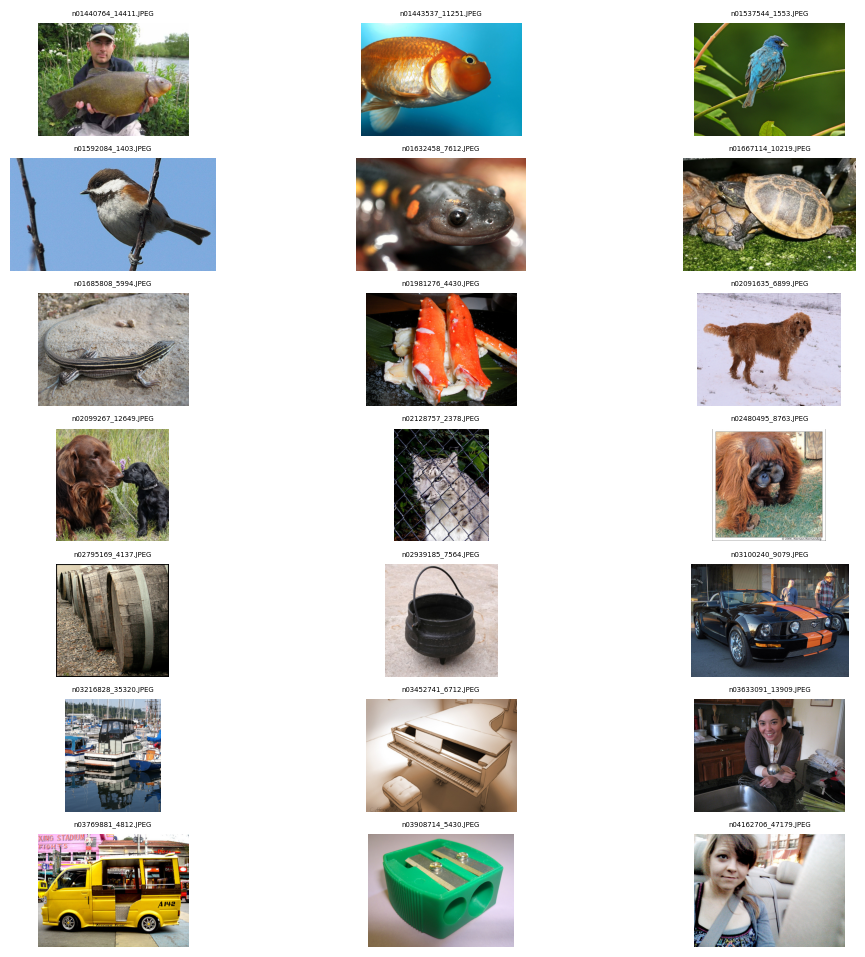

In [3]:
listImage = imageMapping(PATH_TO_SET)

In [4]:
preprocessingList = preprocessingImage(listImage)

In [5]:
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")

In [13]:
# Coincidentally gather picture
rawImage = listImage[3]
testImage = preprocessingList[3] # [1, 3, 224, 224]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

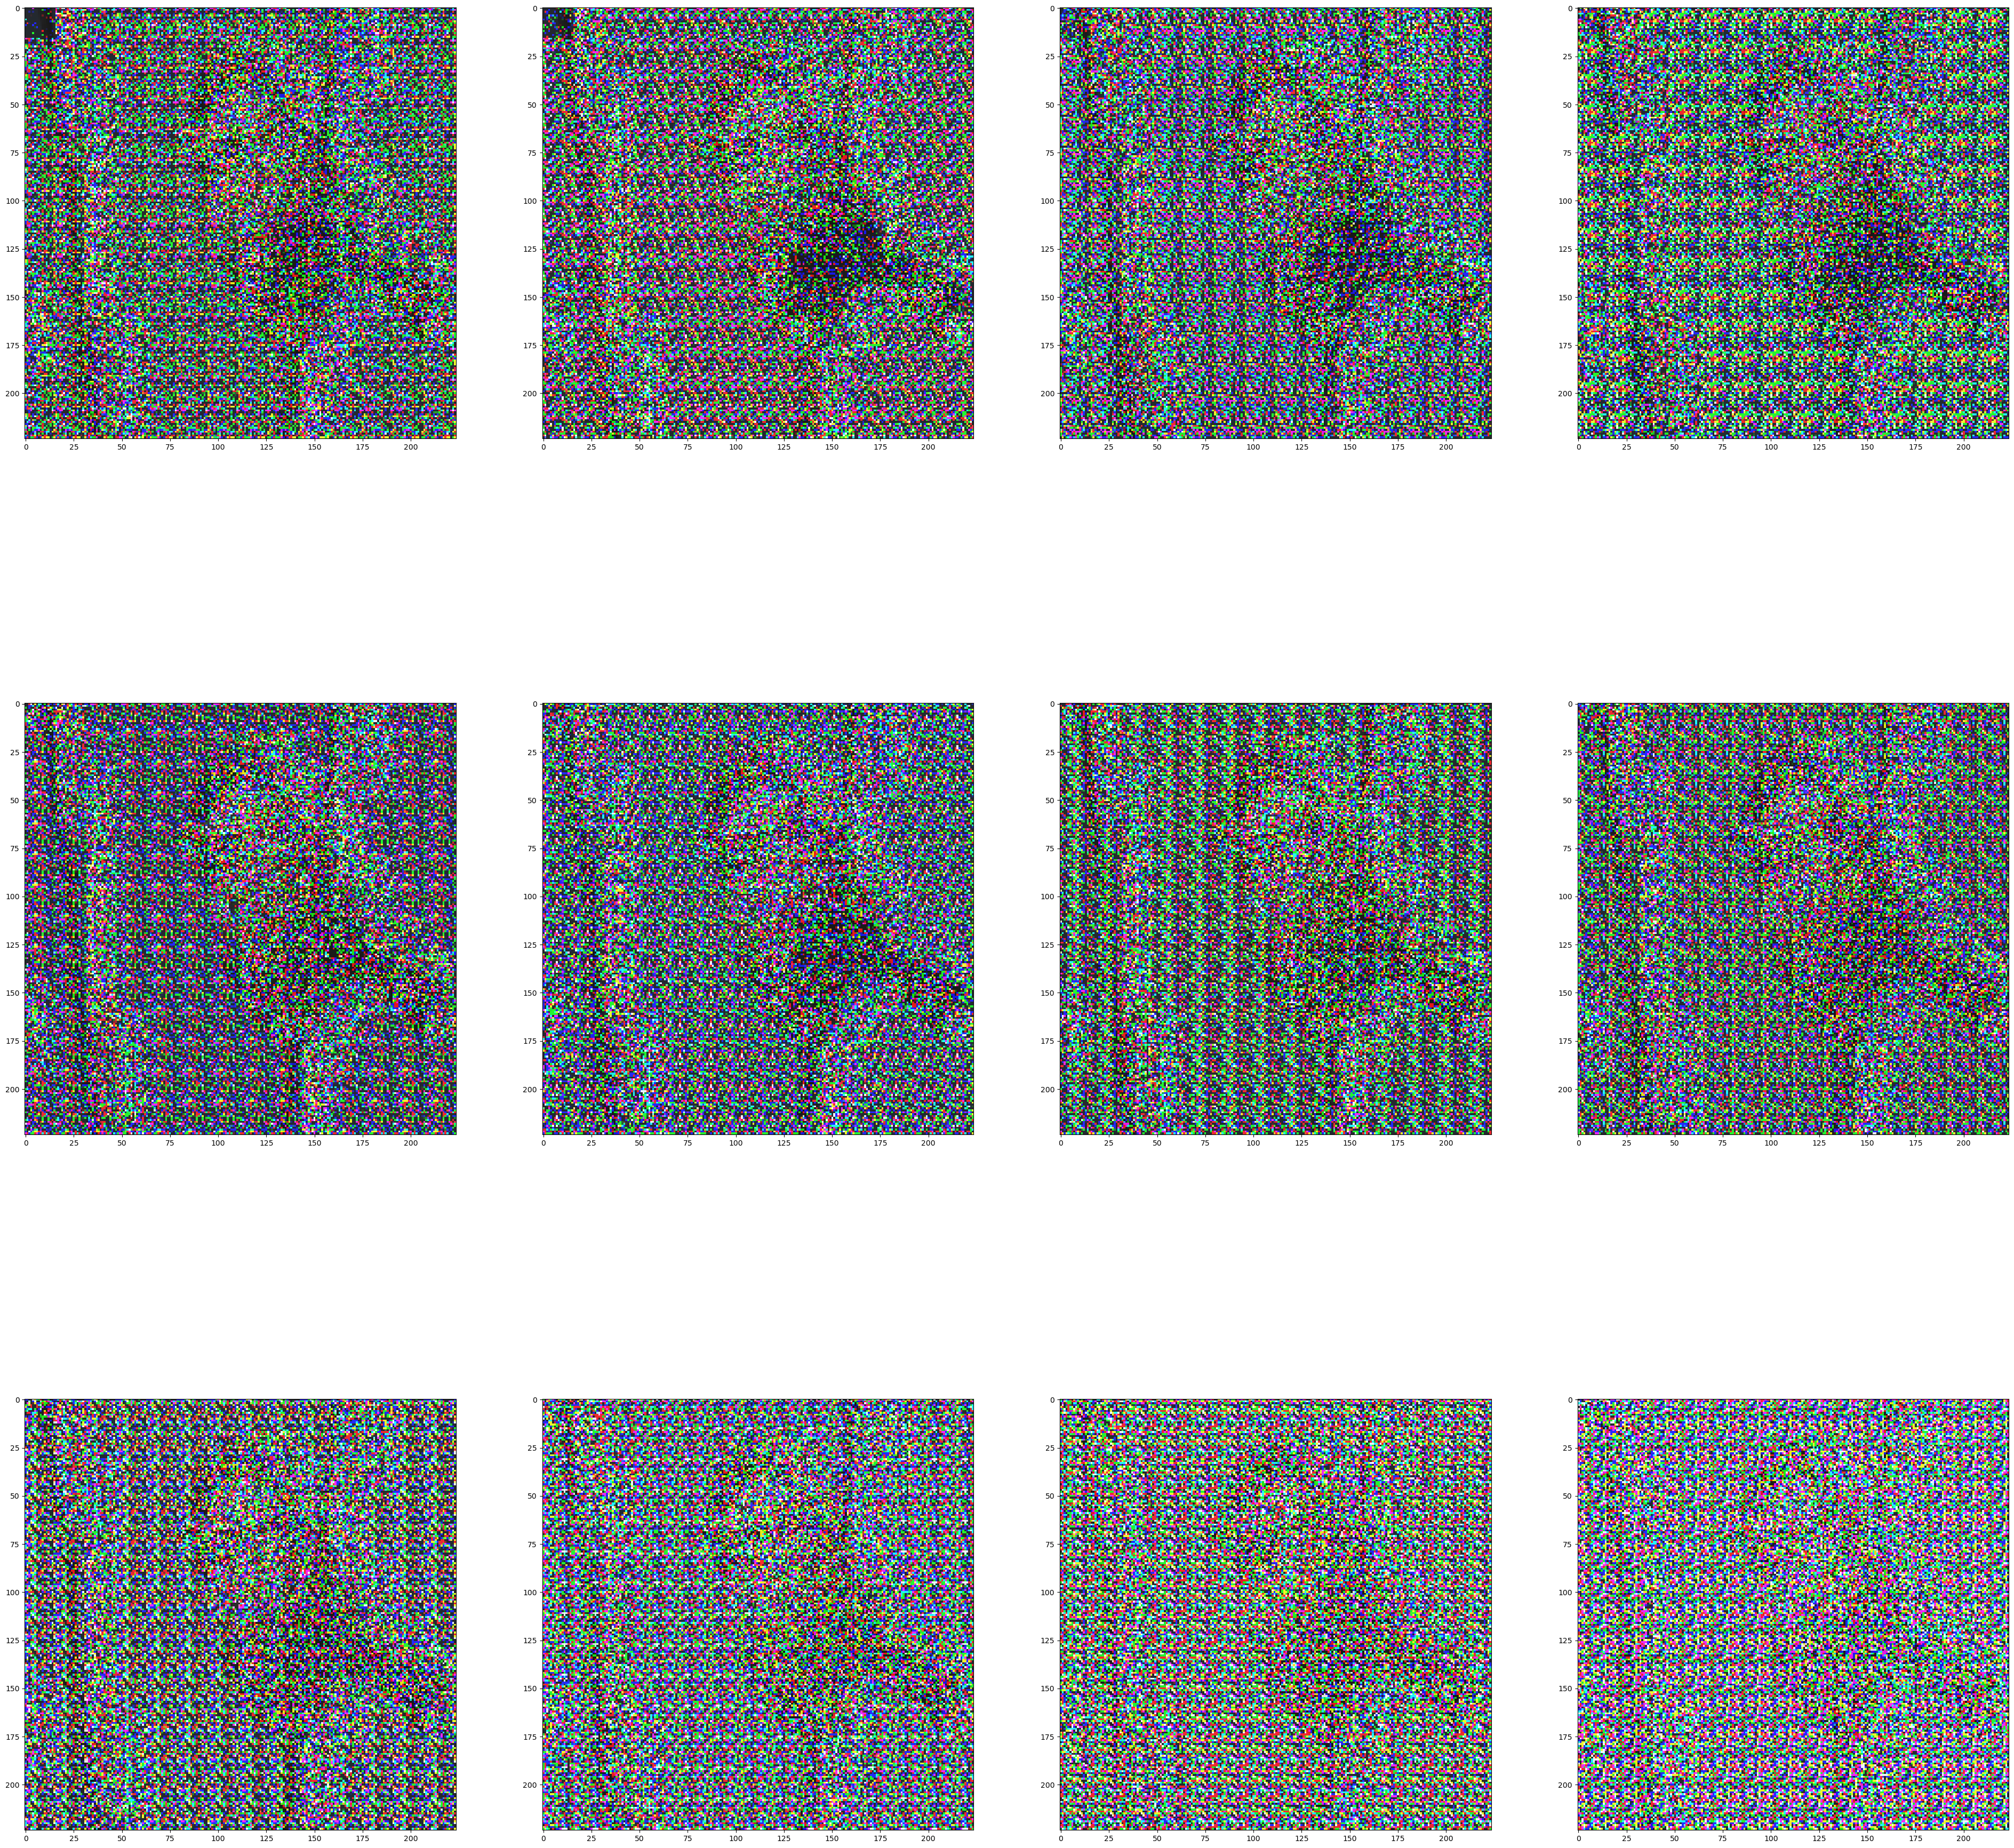

In [14]:
listOfAttentionWeightAfterPass = weightsAfterPassFromViTAttention(model, testImage, rawImage)

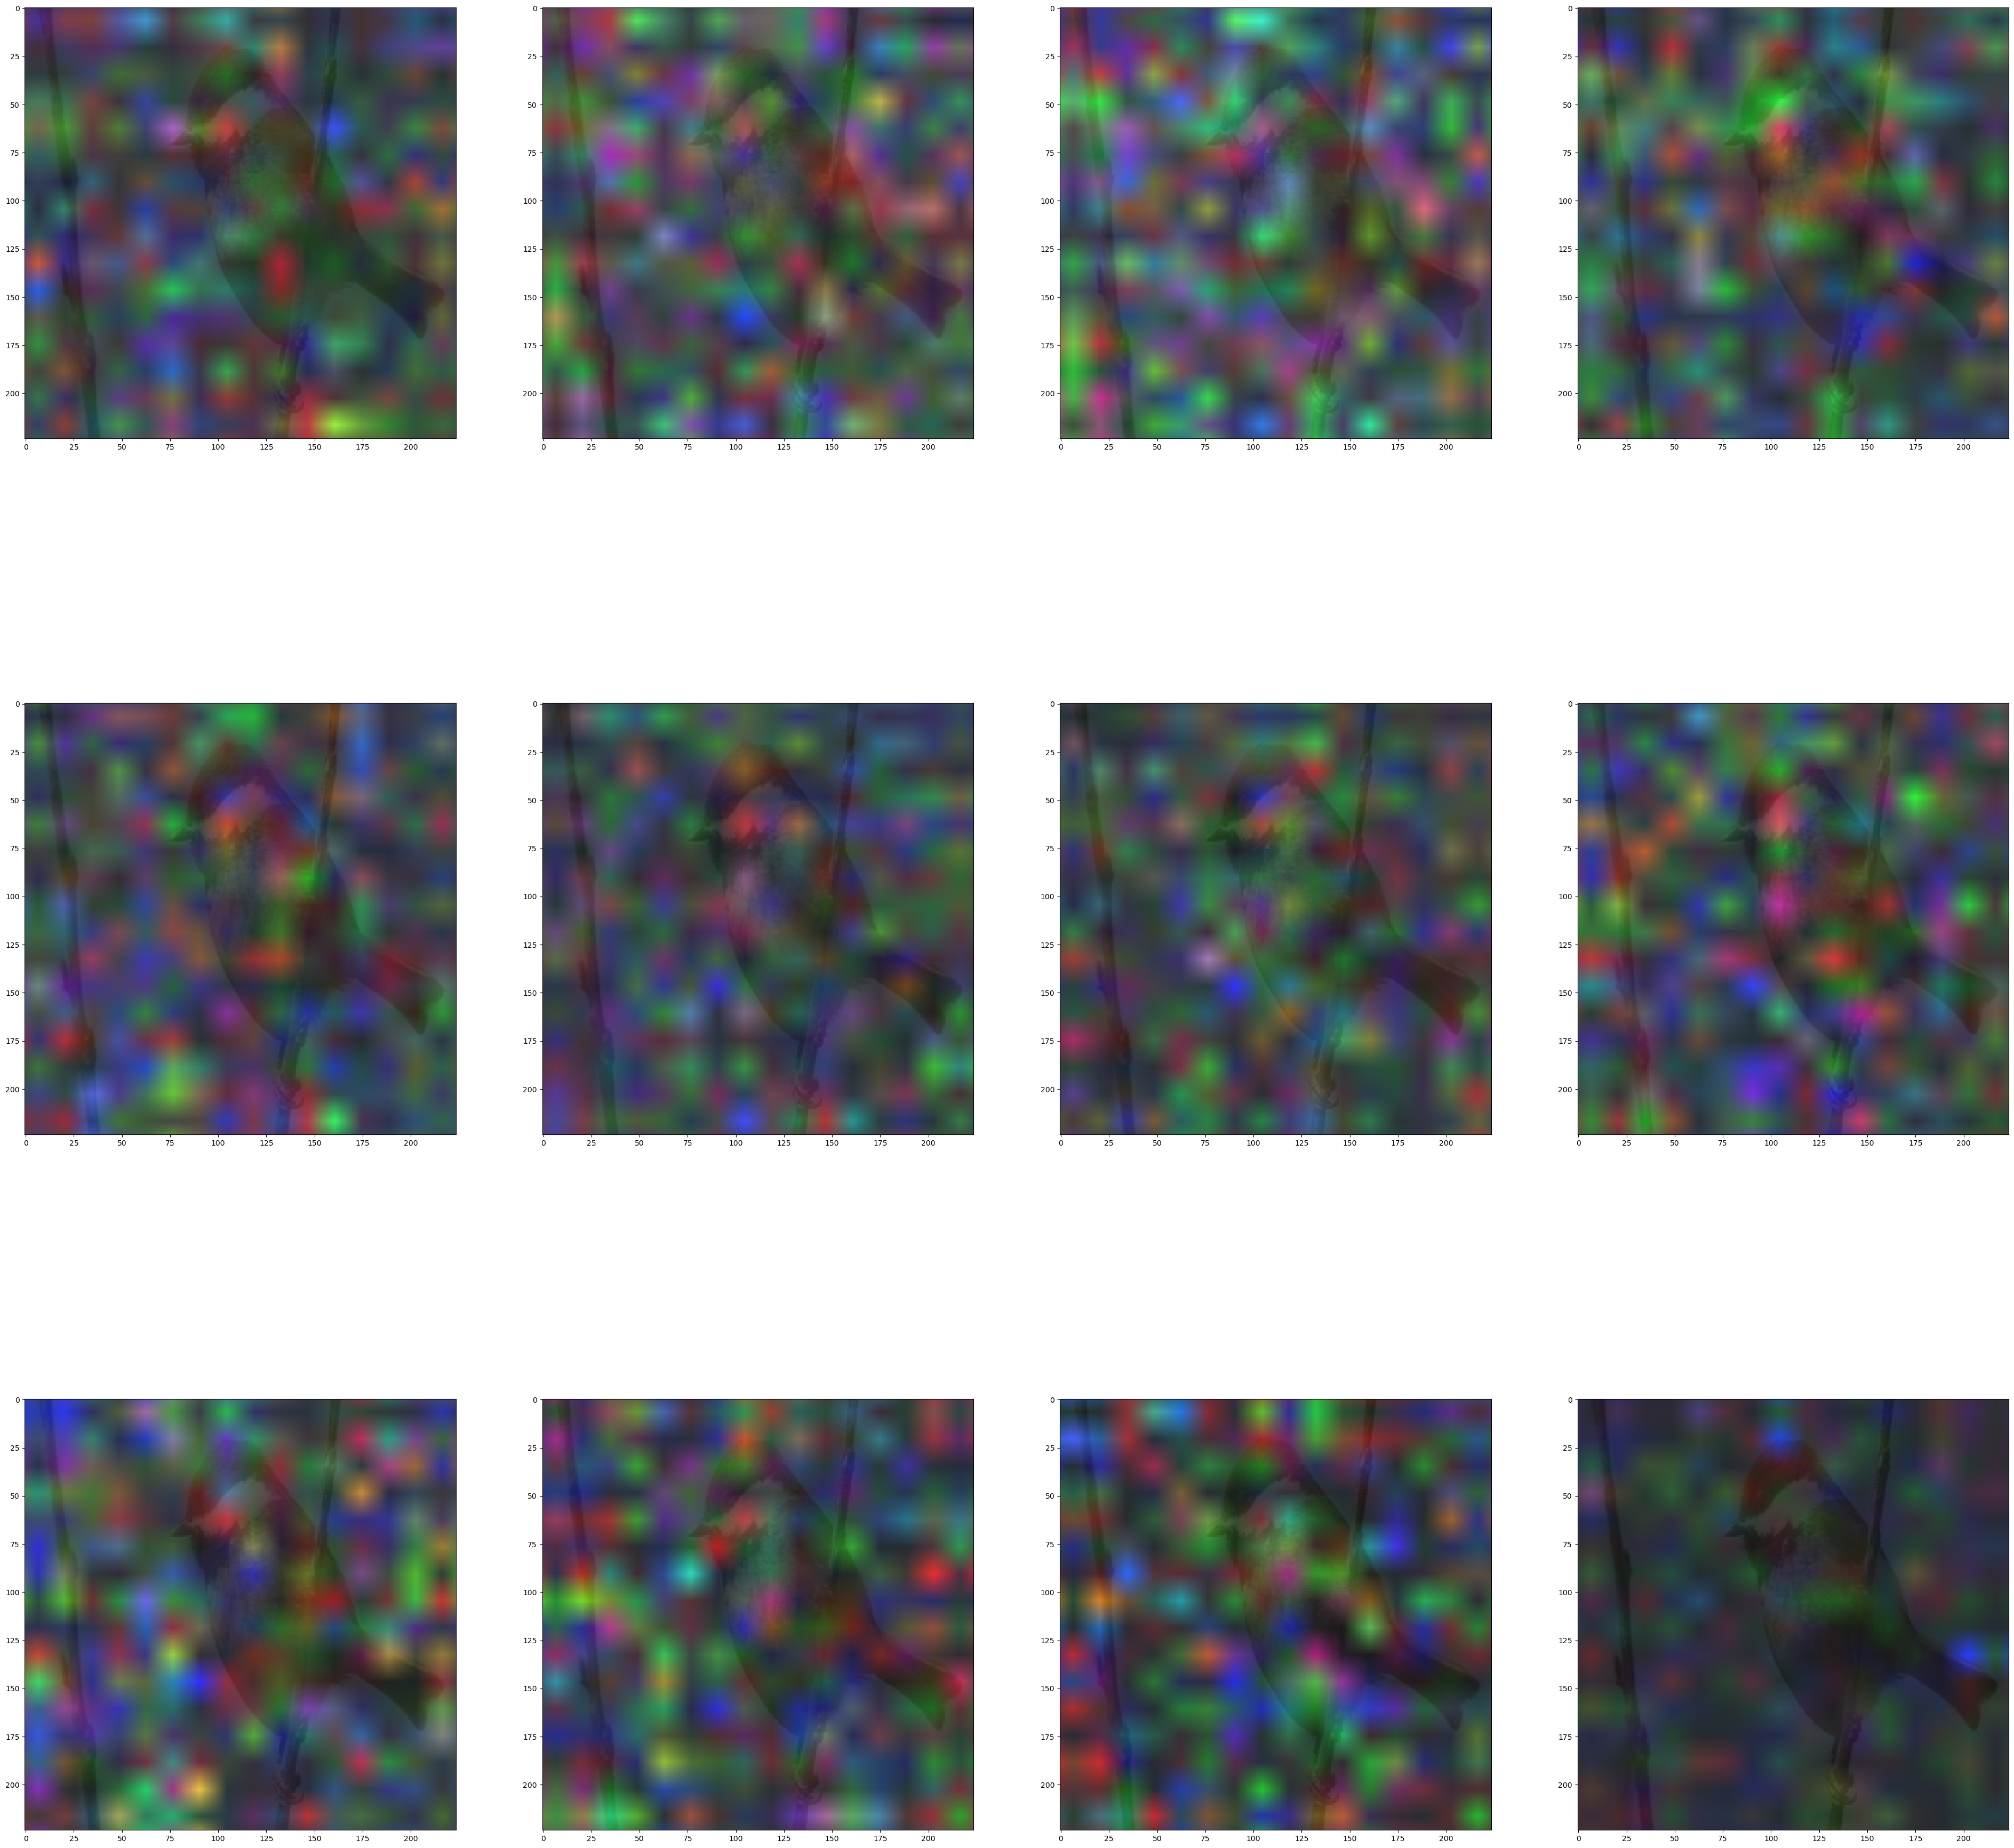

In [15]:
attentionLastLayer = attentionCamSimilar(model, listOfAttentionWeightAfterPass, testImage, rawImage)

torch.Size([1, 768])


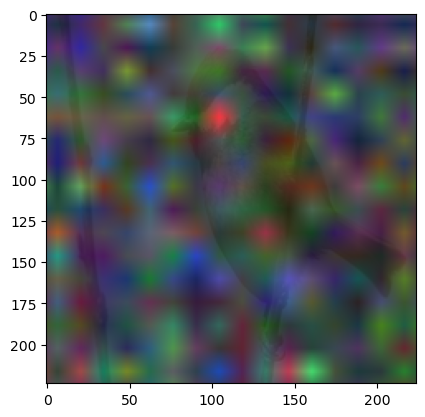

In [16]:
sumOfHead = torch.zeros(768)
print(attentionLastLayer[0].shape)
for i in range(len(attentionLastLayer)):
    sumOfHead += attentionLastLayer[i].squeeze(0)
sumOfHead = sumOfHead - torch.min(sumOfHead)
sumOfHead = sumOfHead / torch.max(sumOfHead)
plt.imshow(transforms.Compose([transforms.Resize((224, 224))])(rawImage), alpha=0.8)
plt.imshow(skimage.transform.resize(sumOfHead.reshape(3, 16, 16).permute(1,2,0).detach().numpy(),                                                       [224, 224]), alpha=0.9, cmap='jet')

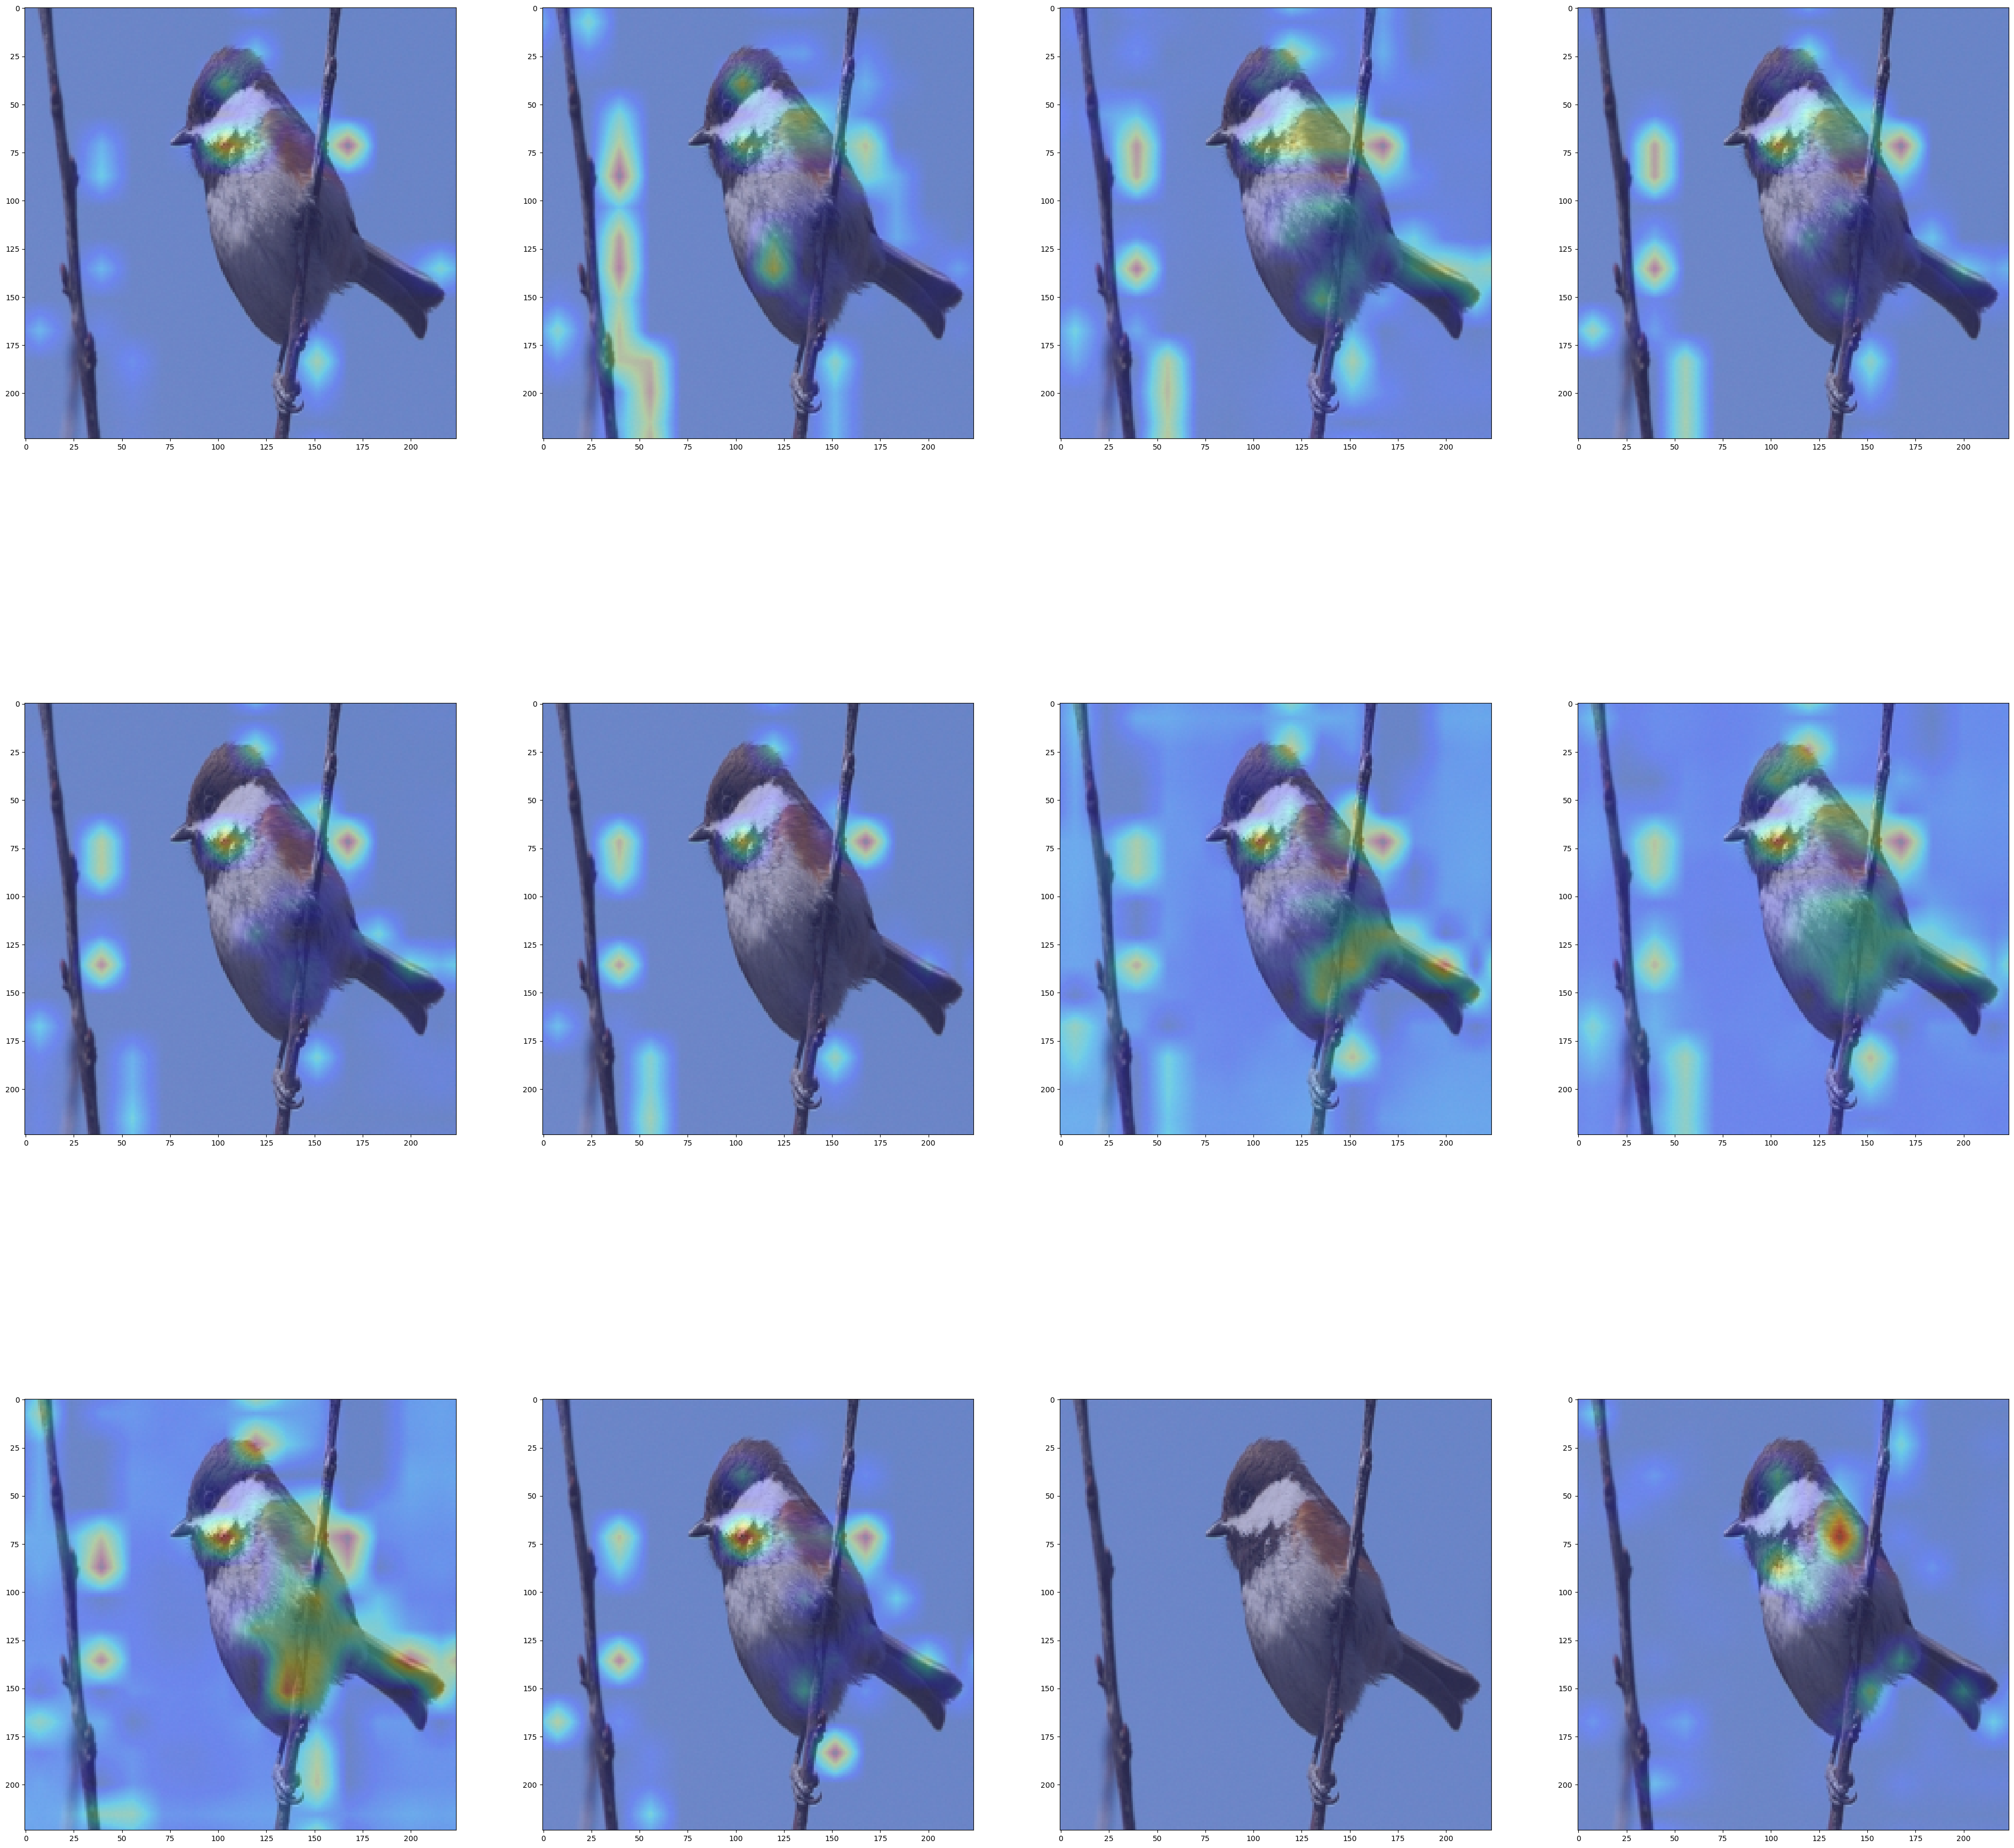

In [17]:
attentionVitLayer = gradForViTAttentionLastLayer(model, testImage, rawImage)


tensor([[[-0.0278, -0.0137, -0.0362,  ...,  0.0021, -0.0057,  0.0096],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]])

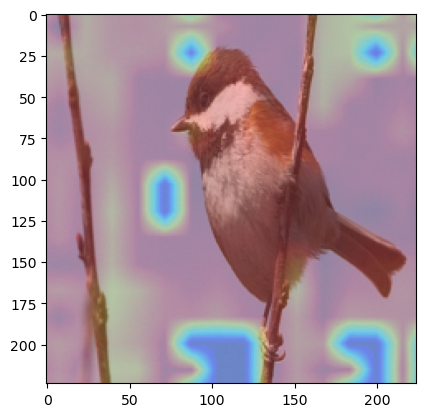

In [18]:
gradForLayerNormLastLayer(model, testImage, rawImage)

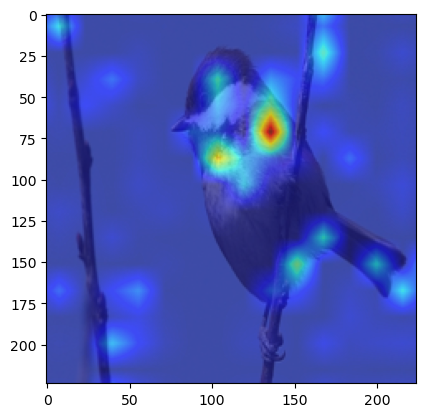

In [19]:
sumOfHeadGrad = torch.zeros(1, 197, 768)
for i in range(len(attentionVitLayer)):
    sumOfHeadGrad =+ attentionVitLayer[i]
plt.imshow(transforms.Compose([transforms.Resize((224, 224))])(rawImage), alpha=0.8)
plt.imshow(skimage.transform.resize(sumOfHeadGrad.detach().numpy(),
                                                             [224,224]),
                                                             alpha=0.6,
                                                             cmap='jet')